In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import offline
from plotly import graph_objs as go
%matplotlib inline

In [75]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
#한글지원
import matplotlib as mpl
mpl.matplotlib_fname()
#결과로 나온 경로로 가서 파일 열고 font.family의 주석을 풀어줌

'/anaconda3/lib/python3.5/site-packages/matplotlib/mpl-data/matplotlibrc'

In [3]:
question = pd.read_csv('/Users/lesson6_mac/AtomData/python/research/schema.csv')
multi = pd.read_csv('/Users/lesson6_mac/AtomData/python/research/multipleChoiceResponses.csv', encoding='ISO-8859-1')
free = pd.read_csv('/Users/lesson6_mac/AtomData/python/research/freeformResponses.csv', encoding='ISO-8859-1')

In [4]:
multi.rename(columns={'GenderSelect':'성별'},inplace=True)

In [5]:
multi['성별'].value_counts()

Male                                                 13610
Female                                                2778
A different identity                                   159
Non-binary, genderqueer, or gender non-conforming       74
Name: 성별, dtype: int64

In [8]:
import matplotlib.font_manager as fm
from matplotlib import rc

In [9]:
rc('font', family="NanumBarunGothic")

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']

['nanumgothic']

[Text(0, 0, 'Non-binary, genderqueer, or gender non-conforming'),
 Text(0, 0, 'Female'),
 Text(0, 0, 'Male'),
 Text(0, 0, 'A different identity')]

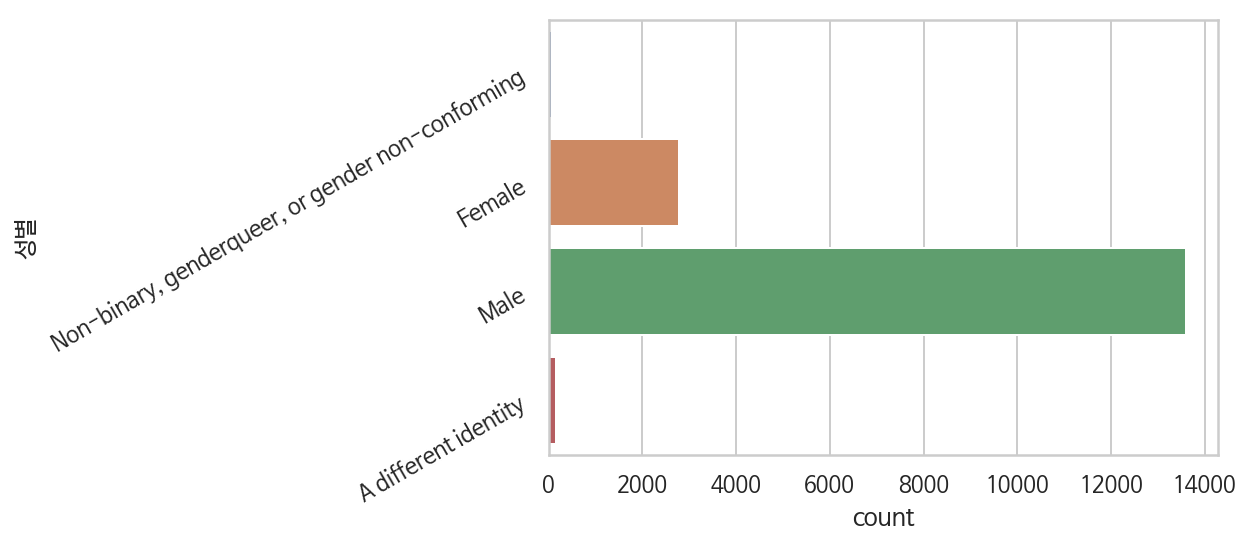

In [8]:
g = sns.countplot(y='성별', data=multi)
g.set_yticklabels(g.get_yticklabels(),rotation=30)
# plt.savefig('/Users/lesson6_mac/Documents/gender.png')

([<matplotlib.patches.Wedge at 0x1c17f49198>,
 [Text(0.7848896732745964, 0.7706803492933354, 'United States'),
  Text(0.9489978984784921, -0.5562400459184915, 'India'),
  Text(0.36172696205214566, -1.0388231827046053, 'Other'),
  Text(0.03518650287830295, -1.0994370877932014, 'Russia'),
  Text(-0.19553454736029433, -1.0824815198369924, 'United Kingdom'),
  Text(-0.39690903538640904, -1.0258962996466214, "People 's Republic of China"),
  Text(-0.571526993696143, -0.9398706801877847, 'Brazil'),
  Text(-0.7265289202486009, -0.8259271929428176, 'Germany'),
  Text(-0.8563112346780407, -0.6904571452046607, 'France'),
  Text(-0.9591536715477916, -0.5385389812784135, 'Canada'),
  Text(-1.0338319697012246, -0.3757545188333554, 'Australia'),
  Text(-1.07621429301993, -0.22751438525862927, 'Spain'),
  Text(-1.0950068244910018, -0.10469027804974372, 'Japan'),
  Text(-1.0999850928630126, 0.005726733724356008, 'Taiwan'),
  Text(-1.0946846713627576, 0.108006806653153, 'Italy'),
  Text(-1.081790076456

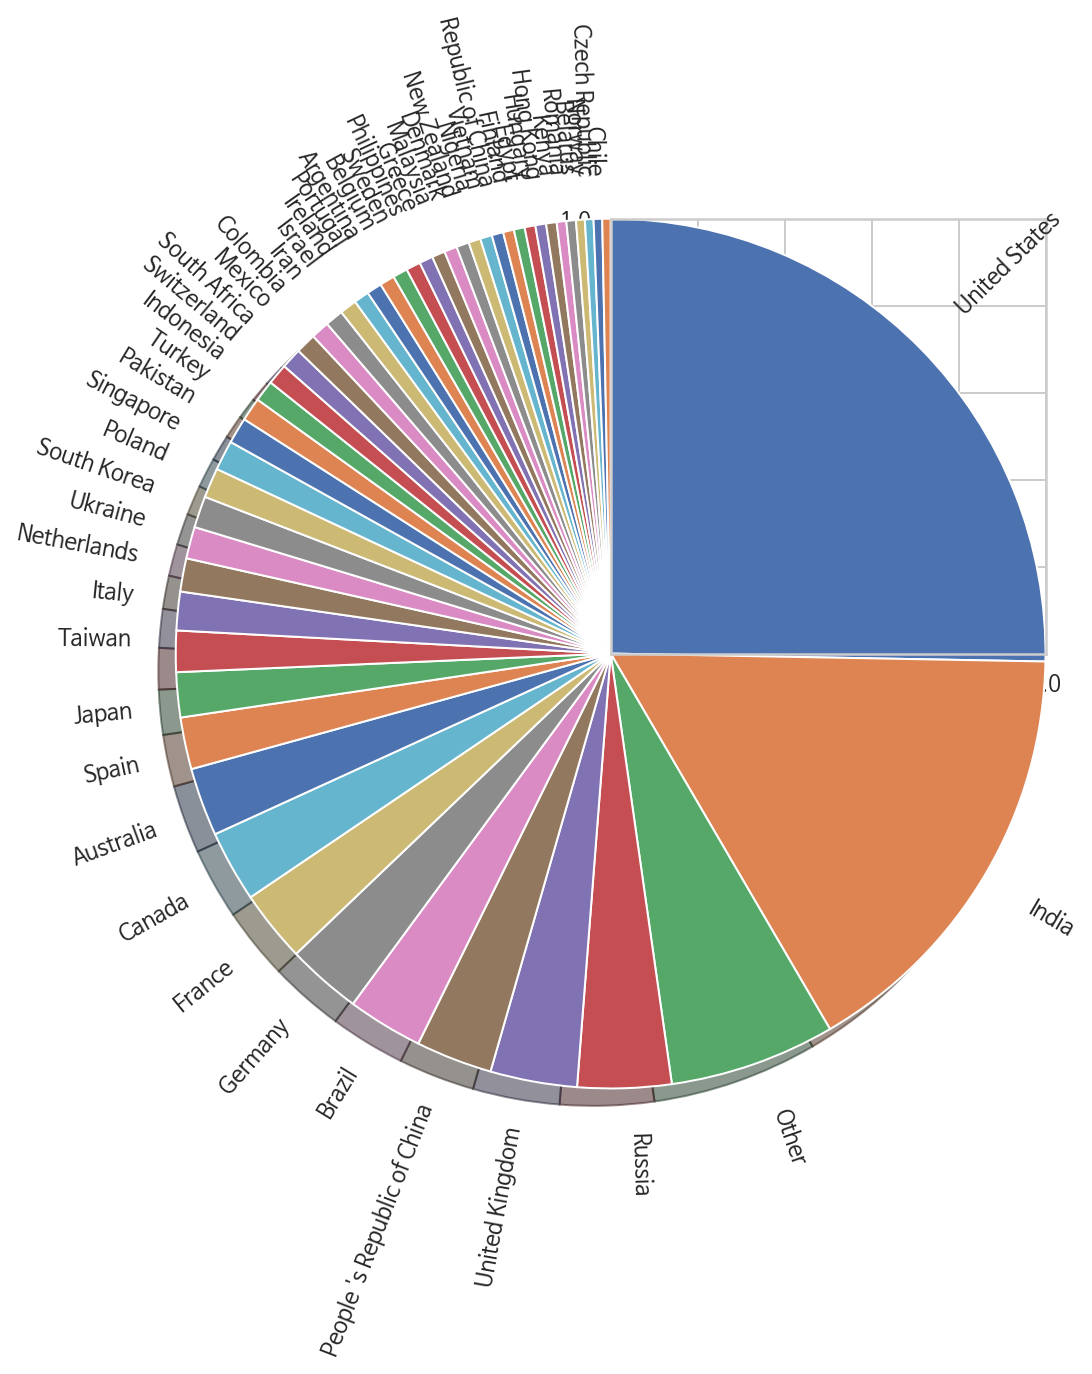

In [9]:
con_df = pd.DataFrame(multi['Country'].value_counts())
labels = con_df.index.tolist()
plt.pie(con_df['Country'], labels=labels, shadow=True, startangle=90, frame=True, rotatelabels=30, counterclock=False)

In [10]:
multi['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

In [11]:
multi_age = multi[multi['Age'] >5]['Age']
multi_age.describe()

count    16367.000000
mean        32.407466
std         10.426959
min          6.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

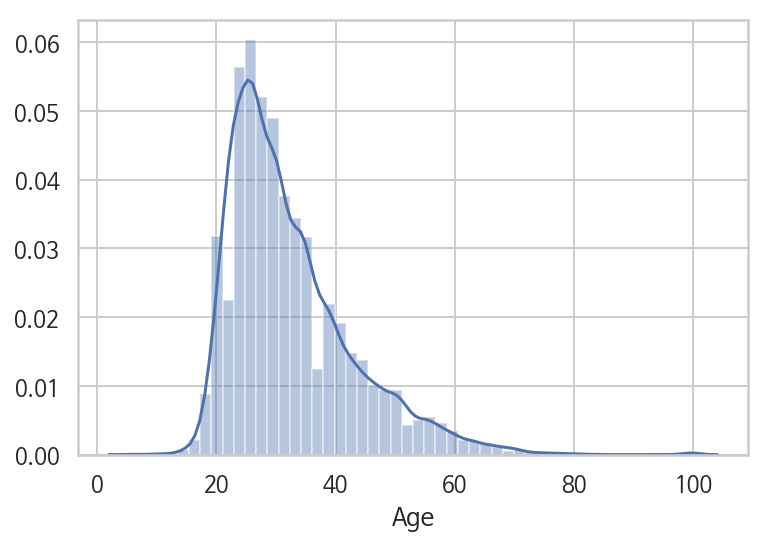

In [12]:
sns.distplot(multi_age)

In [13]:
mc = pd.DataFrame(multi['MajorSelect'].value_counts())
mc

,MajorSelect
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274
Management information systems,237


In [14]:
mp = pd.DataFrame(multi['MajorSelect'].value_counts(normalize=True))
mp

,MajorSelect
Computer Science,0.331074
Mathematics or statistics,0.167156
Engineering (non-computer focused),0.100821
Electrical Engineering,0.098110
Other,0.063851
Physics,0.062495
"Information technology, networking, or system administration",0.052180
A social science,0.039982
Biology,0.020631
Management information systems,0.017845


In [15]:
mt = mc.merge(mp, left_index=True, right_index=True)
mt.columns=[['응답수', '비율']]
mt

,응답수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


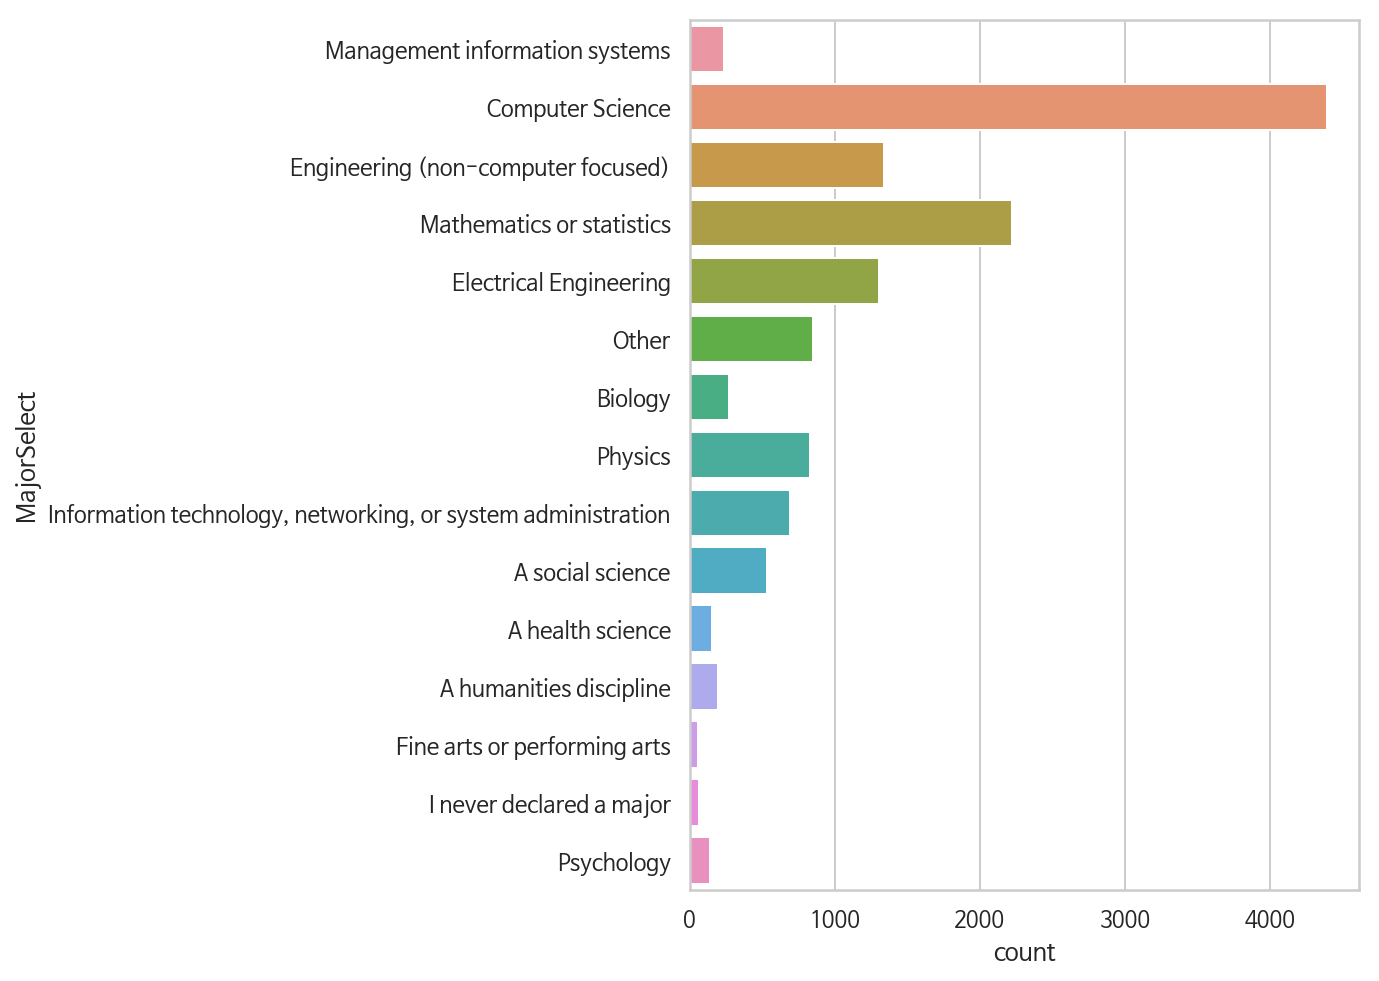

In [16]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=multi)

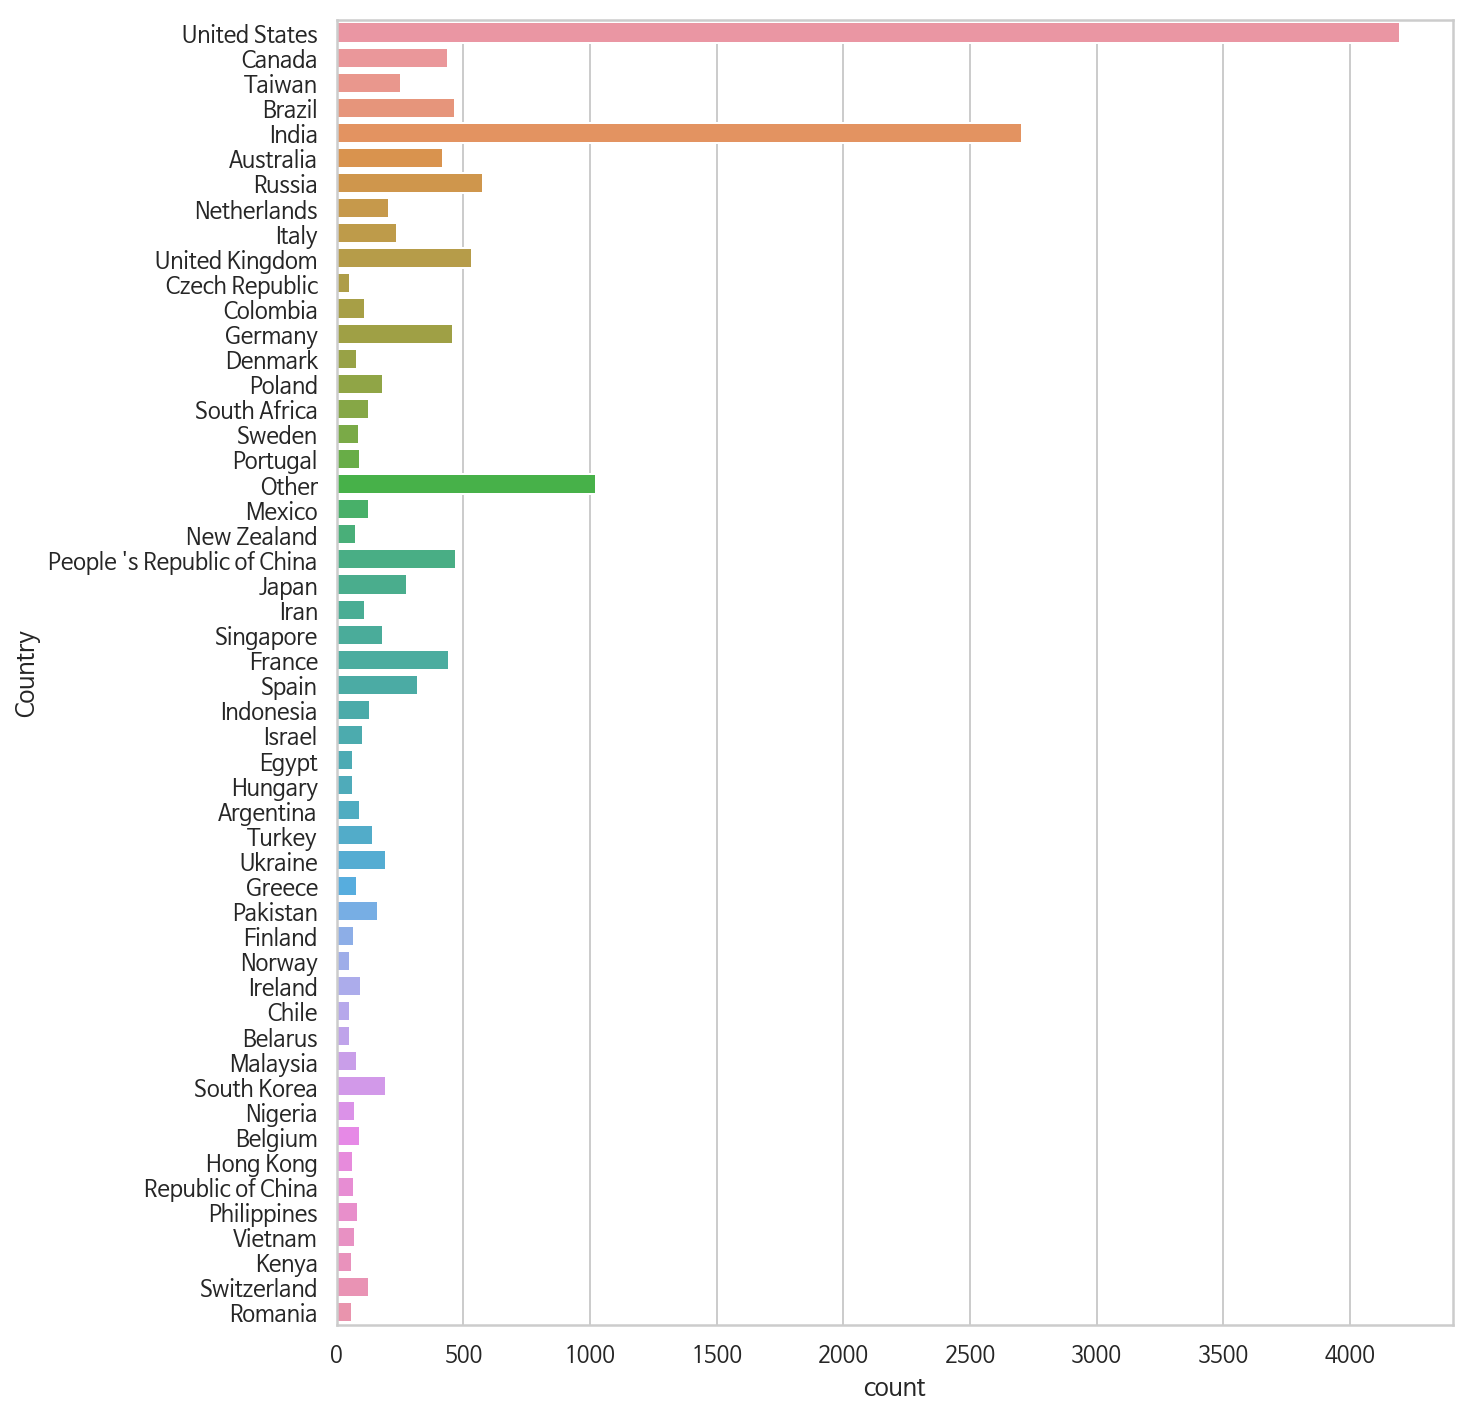

In [18]:
plt.figure(figsize=(10,12))
sns.countplot(y='Country', data=multi)

In [19]:
multi_sing = multi[multi['Country']=='Singapore']

In [30]:
multi_sing.head()

,성별,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
62,Male,Singapore,24.0,Employed full-time,NaN,NaN,Yes,NaN,Data Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,Male,Singapore,33.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Perfectly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,Female,Singapore,27.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Perfectly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,Female,Singapore,16.0,"Not employed, and not looking for work",No,"Yes, I'm focused on learning mostly data scien...",NaN,NaN,NaN,NaN,...,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important
598,Male,Singapore,30.0,Employed full-time,NaN,NaN,No,Yes,Other,Poorly,...,Somewhat important,Not important,Not important,Very Important,Somewhat important,Not important,Not important,Very Important,Somewhat important,Somewhat important


In [29]:
n_answer = len(multi_sing.index)
n_answer

184

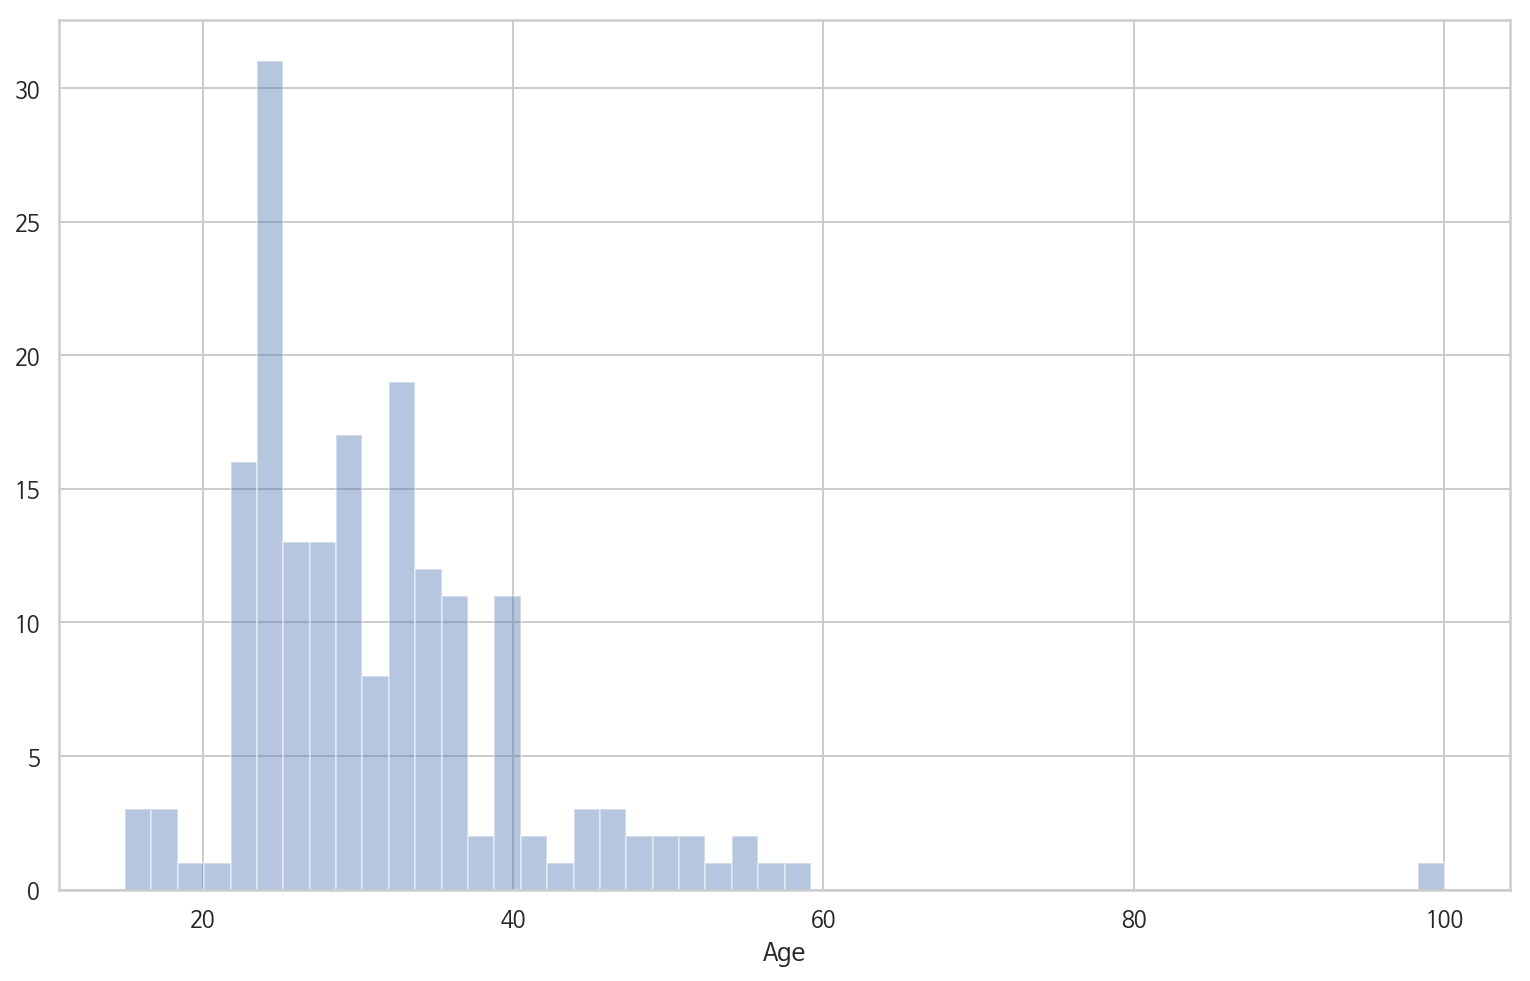

In [57]:
plt.figure(figsize=(13,8))
sns.distplot(multi_sing['Age'], bins=50,kde=False)

In [77]:
multi_sing[multi_sing['Age']>59]

,성별,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,JobSkillImportancePython,JobSkillImportanceR,JobSkillImportanceSQL,JobSkillImportanceKaggleRanking,JobSkillImportanceMOOC,JobSkillImportanceVisualizations,JobSkillImportanceOtherSelect1,JobSkillImportanceOtherSelect2,JobSkillImportanceOtherSelect3,CoursePlatformSelect,HardwarePersonalProjectsSelect,TimeSpentStudying,ProveKnowledgeSelect,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,FirstTrainingSelect,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,MLSkillsSelect,MLTechniquesSelect,ParentsEducation,EmployerIndustry,EmployerSize,EmployerSizeChange,EmployerMLTime,EmployerSearchMethod,UniversityImportance,JobFunctionSelect,WorkHardwareSelect,WorkDataTypeSelect,WorkProductionFrequency,WorkDatasetSize,WorkAlgorithmsSelect,WorkToolsSelect,WorkToolsFrequencyAmazonML,WorkToolsFrequencyAWS,WorkToolsFrequencyAngoss,WorkToolsFrequencyC,WorkToolsFrequencyCloudera,WorkToolsFrequencyDataRobot,WorkToolsFrequencyFlume,WorkToolsFrequencyGCP,WorkToolsFrequencyHadoop,WorkToolsFrequencyIBMCognos,WorkToolsFrequencyIBMSPSSModeler,WorkToolsFrequencyIBMSPSSStatistics,WorkToolsFrequencyIBMWatson,WorkToolsFrequencyImpala,WorkToolsFrequencyJava,WorkToolsFrequencyJulia,WorkToolsFrequencyJupyter,WorkToolsFrequencyKNIMECommercial,WorkToolsFrequencyKNIMEFree,WorkToolsFrequencyMathematica,WorkToolsFrequencyMATLAB,WorkToolsFrequencyAzure,WorkToolsFrequencyExcel,WorkToolsFrequencyMicrosoftRServer,WorkToolsFrequencyMicrosoftSQL,WorkToolsFrequencyMinitab,WorkToolsFrequencyNoSQL,WorkToolsFrequencyOracle,WorkToolsFrequencyOrange,WorkToolsFrequencyPerl,WorkToolsFrequencyPython,WorkToolsFrequencyQlik,WorkToolsFrequencyR,WorkToolsFrequencyRapidMinerCommercial,WorkToolsFrequencyRapidMinerFree,WorkToolsFrequencySalfrod,WorkToolsFrequencySAPBusinessObjects,WorkToolsFrequencySASBase,WorkToolsFrequencySASEnterprise,WorkToolsFrequencySASJMP,WorkToolsFrequencySpark,WorkToolsFrequencySQL,WorkToolsFrequencyStan,WorkToolsFrequencyStatistica,WorkToolsFrequencyTableau,WorkToolsFrequencyTensorFlow,WorkToolsFrequencyTIBCO,WorkToolsFrequencyUnix,WorkToolsFrequencySelect1,WorkToolsFrequencySelect2,WorkFrequencySelect3,WorkMethodsSelect,WorkMethodsFrequencyA/B,WorkMethodsFrequencyAssociationRules,WorkMethodsFrequencyBayesian,WorkMethodsFrequencyCNNs,WorkMethodsFrequencyCollaborativeFiltering,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyEnsembleMethods,WorkMethodsFrequencyEvolutionaryApproaches,WorkMethodsFrequencyGANs,WorkMethodsFrequencyGBM,WorkMethodsFrequencyHMMs,WorkMethodsFrequencyKNN,WorkMethodsFrequencyLiftAnalysis,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyMLN,WorkMethodsFrequencyNaiveBayes,WorkMethodsFrequencyNLP,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyPrescriptiveModeling

/anaconda3/lib/python3.5/site-packages/matplotlib/legend.py:1266: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



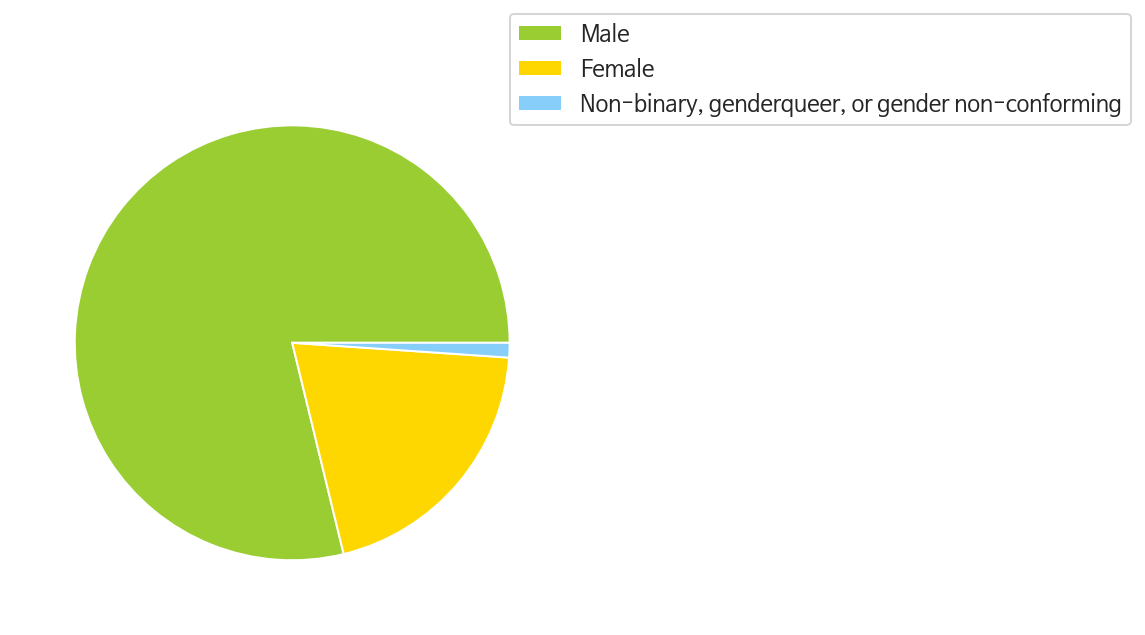

In [70]:
plt.figure(figsize=(5,5))
piechart = plt.pie(multi_sing['성별'].value_counts(), colors= ['yellowgreen', 'gold', 'lightskyblue'])
plt.legend(piechart,labels=multi_sing['성별'].value_counts().index.tolist(), loc=(.9,.9))

In [52]:
job = pd.DataFrame(multi['EmploymentStatus'].value_counts())
job

,EmploymentStatus
Employed full-time,10897
"Not employed, but looking for work",2110
"Independent contractor, freelancer, or self-employed",1330
"Not employed, and not looking for work",924
Employed part-time,917
I prefer not to say,420
Retired,118


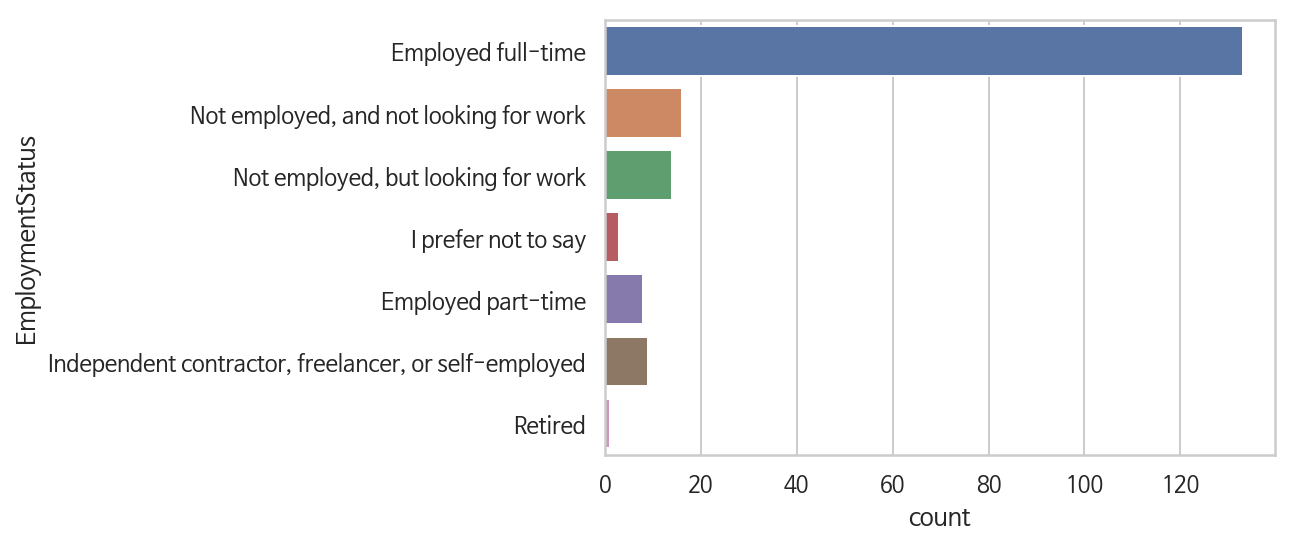

In [71]:
sns.countplot(y='EmploymentStatus',data=multi_sing)

In [79]:
multi_sing['LanguageRecommendationSelect'].value_counts()

Python      100
R            24
SQL           5
C/C++/C#      5
SAS           1
Matlab        1
Scala         1
Name: LanguageRecommendationSelect, dtype: int64

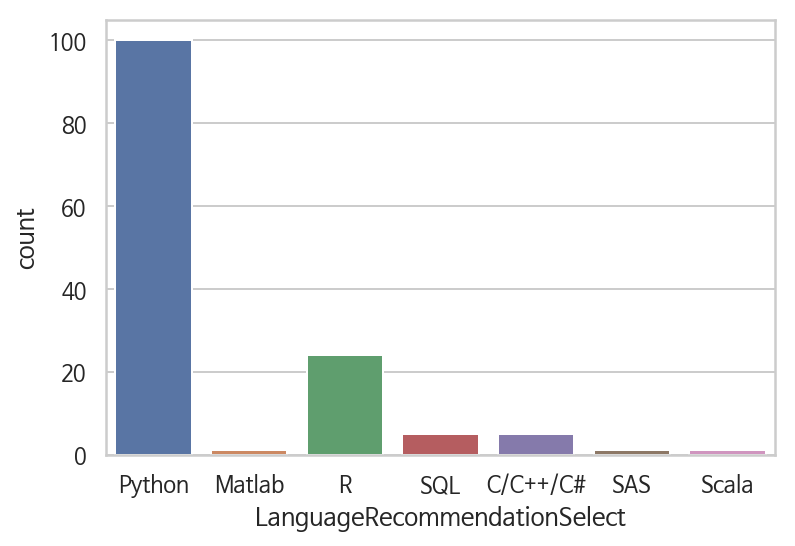

In [80]:
sns.countplot(x='LanguageRecommendationSelect',data=multi_sing)

([<matplotlib.patches.Wedge at 0x1c32555e48>,
 [Text(-0.7272538110634401, -0.8252889762342053, 'Python'),
  Text(0.45278069903330403, 1.0024917149697112, 'R'),
  Text(0.9749018034677409, 0.5094766663894889, 'SQL'),
  Text(1.0651900863458306, 0.274536117752405, 'C/C++/C#'),
  Text(1.092777524572299, 0.12584626251755884, 'SAS'),
  Text(1.097398082546269, 0.07561381106499017, 'Matlab'),
  Text(1.0997107953611804, 0.025222342596991246, 'Scala')])

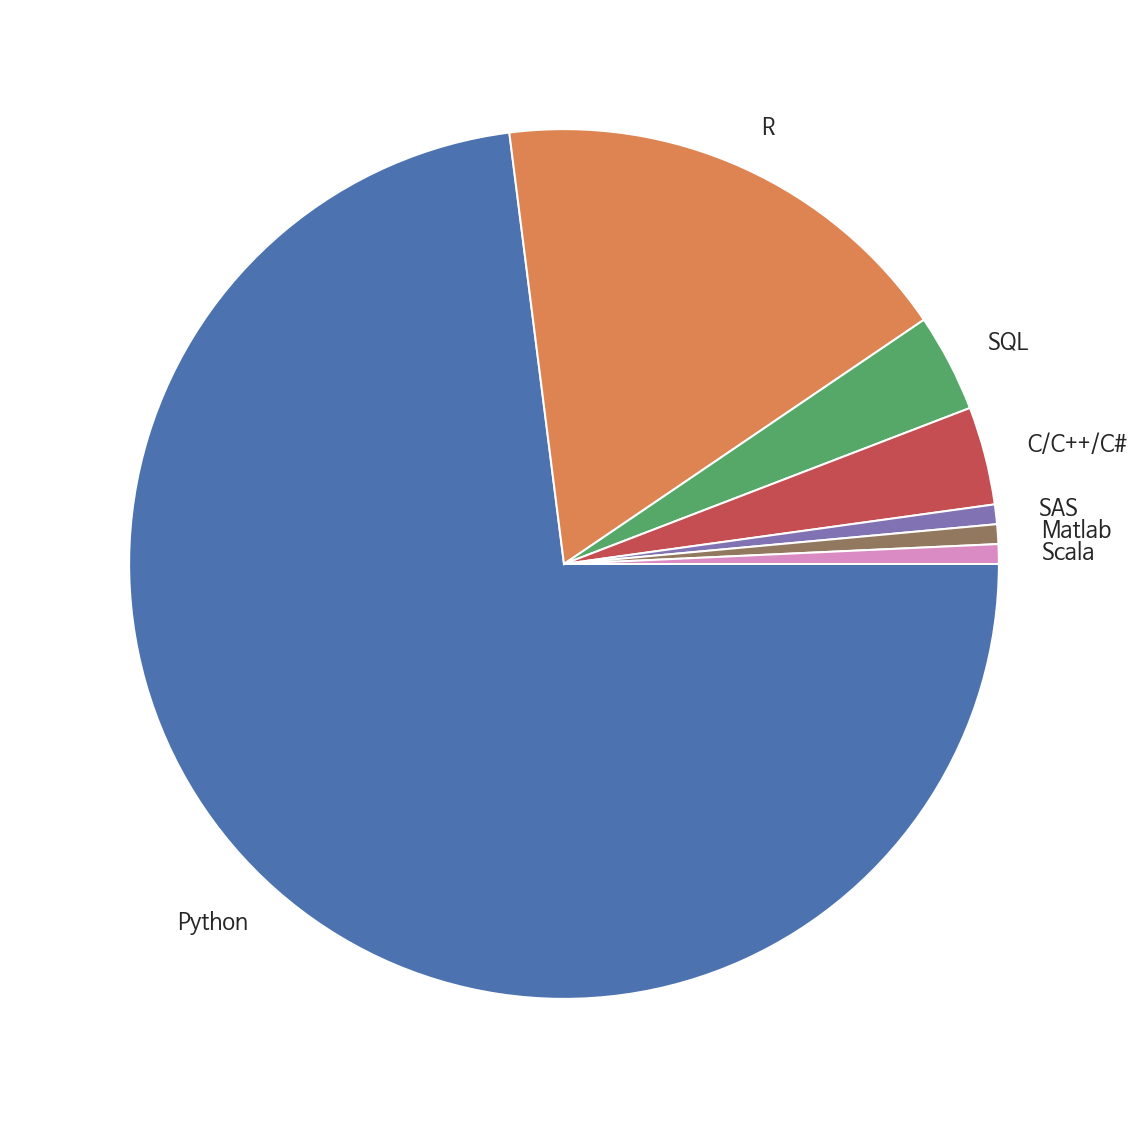

In [87]:
plt.figure(figsize=(10,10))
plt.pie(multi_sing['LanguageRecommendationSelect'].value_counts(),\
       labels=multi_sing['LanguageRecommendationSelect'].value_counts().index.tolist(), counterclock=False)